In [ ]:
import torch
from torchvision import transforms
from PIL import Image
from matplotlib import pylab as P
import numpy as np
from torchvision.models import vgg16
from pytorch_grad_cam.utils.image import show_cam_on_image
from fd_cam import FDCAM
import warnings
warnings.filterwarnings('ignore')

In [2]:
def Loadimage(path):
  im = Image.open(path).convert("RGB")
  im = im.resize((224,224))
  im = np.asarray(im)
  return im
def ShowImage(im, title='', ax=None):
  if ax is None:
    P.figure()
  P.axis('off')
  P.imshow(im)
  P.title(title)
  
transform_normalize = transforms.Normalize(
     mean=[0.485, 0.456, 0.406],
     std=[0.229, 0.224, 0.225]
 )
transform = transforms.Compose([
 transforms.Resize((224,224)),
 transforms.ToTensor(),
 transform_normalize
])

In [5]:
model = vgg16(pretrained=True).eval()
target_layers = [model.features[-1]]
model = model.cuda()

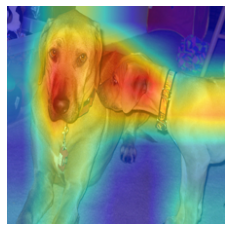

In [22]:
img_path = '../images/henFence.jpg' 

img_orig = Image.open(img_path).convert('RGB')
img3 = transform(img_orig)
input_tensor = img3.unsqueeze(0)
img_show = Loadimage(img_path)
target_category = model(input_tensor.cuda()).topk(1)[1][0][0].cpu().item()
cam = FDCAM(model=model, target_layers=target_layers, use_cuda='0')
grayscale_cam = cam(input_tensor=input_tensor, target_category=target_category)
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(img_show/255,grayscale_cam,use_rgb = True)
ShowImage(visualization)